# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# Problem Statement

TO classify heart disease patient to have chance of heart attact or not

# Data Gathering

In [3]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.shape

(303, 14)

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# The missing values are not present 

# EDA

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
# Age

In [10]:
df['age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

<AxesSubplot:xlabel='age'>

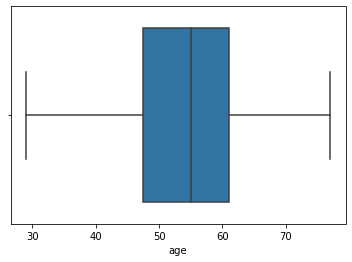

In [11]:
# sns.boxplot(x=df['age'])

In [12]:
#sex

In [13]:
df['sex'].unique()

array([1, 0], dtype=int64)

In [14]:
#cp

In [15]:
df['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [16]:
#trestbps

In [17]:
df['trestbps'].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

<AxesSubplot:xlabel='trestbps'>

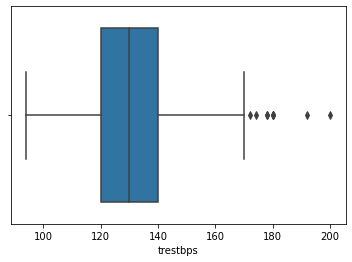

In [18]:
# sns.boxplot(x=df['trestbps'])

In [19]:
#chol

In [20]:
df['chol'].unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131], dtype=int64)

<AxesSubplot:xlabel='chol'>

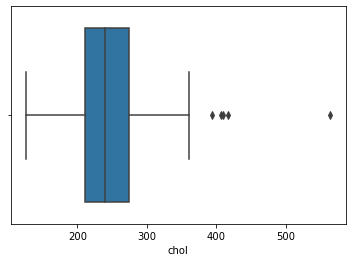

In [21]:
# sns.boxplot(x=df['chol'])

In [22]:
#fbs

In [23]:
df['fbs'].unique()

array([1, 0], dtype=int64)

In [24]:
#restecg

In [25]:
df['restecg'].unique()

array([0, 1, 2], dtype=int64)

In [26]:
#thalach

In [27]:
df['thalach'].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90],
      dtype=int64)

<AxesSubplot:xlabel='thalach'>

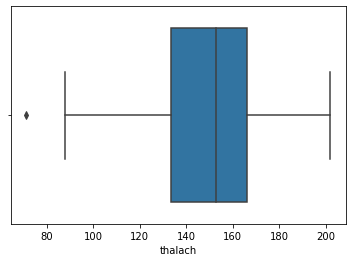

In [28]:
# sns.boxplot(x=df['thalach'])

In [29]:
# oldpeak

In [30]:
df['oldpeak'].unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

<AxesSubplot:xlabel='oldpeak'>

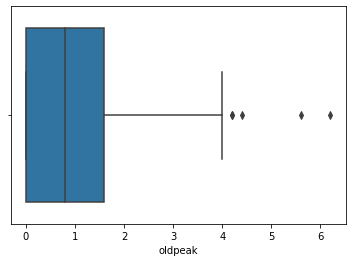

In [31]:
# sns.boxplot(x=df['oldpeak'])

In [32]:
#slope

In [33]:
df['slope'].unique()

array([0, 2, 1], dtype=int64)

In [34]:
#ca

In [35]:
df['ca'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [36]:
#thal

In [37]:
df['thal'].unique()

array([1, 2, 3, 0], dtype=int64)

In [38]:
#target This is our dependent variable

In [39]:
df['target'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='target', ylabel='count'>

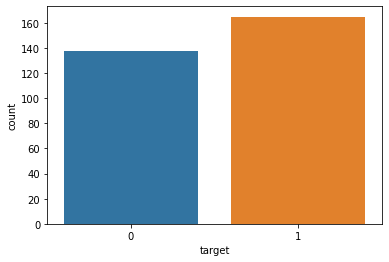

In [40]:
sns.countplot(x=df['target'])

# Feature selection

In [41]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [42]:
# All the features aare important for this problem so we can not delete any feature

In [43]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

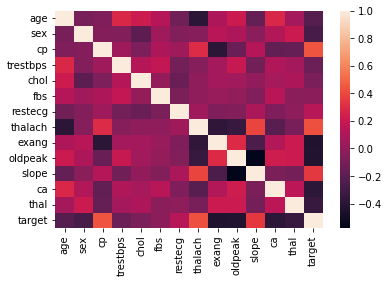

In [44]:
sns.heatmap(df.corr())

# Model Building

In [45]:
x=df.drop('target',axis=1)
y=df['target']

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2,stratify=y)

In [47]:
x_train.shape

(242, 13)

In [48]:
x_test.shape

(61, 13)

In [49]:
y_train.shape

(242,)

In [50]:
y_test.shape

(61,)

In [51]:
lgr=LogisticRegression()

In [52]:
lgr.fit(x_train,y_train)

C:\Users\mayur\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation

# Model evaluation on training Data

In [53]:
y_pred_train=lgr.predict(x_train)
y_prob_train=lgr.predict_proba(x_train)
cnf=confusion_matrix(y_train,y_pred_train)
print('COnfusion matrux is :\n',cnf)
accuracy=accuracy_score(y_train,y_pred_train)
print('Accuracy is :',accuracy)
clf_r=classification_report(y_train,y_pred_train)
print('Classification replort is\n:',clf_r)

COnfusion matrux is :
 [[ 85  25]
 [ 11 121]]
Accuracy is : 0.8512396694214877
Classification replort is
:               precision    recall  f1-score   support

           0       0.89      0.77      0.83       110
           1       0.83      0.92      0.87       132

    accuracy                           0.85       242
   macro avg       0.86      0.84      0.85       242
weighted avg       0.85      0.85      0.85       242



# Model evaluation on test Data

In [54]:
y_pred_test=lgr.predict(x_test)
y_prob_test=lgr.predict_proba(x_test)
cnf=confusion_matrix(y_test,y_pred_test)
print('COnfusion matrux is :\n',cnf)
accuracy=accuracy_score(y_test,y_pred_test)
print('Accuracy is :',accuracy)
clf_r=classification_report(y_test,y_pred_test)
print('Classification replort is\n:',clf_r)

COnfusion matrux is :
 [[23  5]
 [ 6 27]]
Accuracy is : 0.819672131147541
Classification replort is
:               precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.82      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [55]:
# ROC_AUC

In [57]:
y_prob_test

array([[0.99252539, 0.00747461],
       [0.05627015, 0.94372985],
       [0.11851224, 0.88148776],
       [0.99437976, 0.00562024],
       [0.48351912, 0.51648088],
       [0.17630391, 0.82369609],
       [0.97633417, 0.02366583],
       [0.94207175, 0.05792825],
       [0.43674956, 0.56325044],
       [0.50430129, 0.49569871],
       [0.09030226, 0.90969774],
       [0.90631009, 0.09368991],
       [0.99677163, 0.00322837],
       [0.76345014, 0.23654986],
       [0.01286418, 0.98713582],
       [0.22237068, 0.77762932],
       [0.97765376, 0.02234624],
       [0.38743989, 0.61256011],
       [0.80080754, 0.19919246],
       [0.02368089, 0.97631911],
       [0.22711978, 0.77288022],
       [0.53921154, 0.46078846],
       [0.01007461, 0.98992539],
       [0.43658958, 0.56341042],
       [0.77478437, 0.22521563],
       [0.90021749, 0.09978251],
       [0.96876082, 0.03123918],
       [0.97878081, 0.02121919],
       [0.07583532, 0.92416468],
       [0.96075857, 0.03924143],
       [0.

In [58]:
y_pred_test

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1], dtype=int64)

In [59]:
fpr,tpr,thresh=roc_curve(y_test,y_prob_test[:,1])

In [60]:
fpr

array([0.        , 0.        , 0.        , 0.03571429, 0.03571429,
       0.07142857, 0.07142857, 0.10714286, 0.10714286, 0.17857143,
       0.17857143, 0.39285714, 0.39285714, 0.5       , 0.5       ,
       0.57142857, 0.57142857, 0.71428571, 0.71428571, 1.        ])

In [61]:
tpr

array([0.        , 0.03030303, 0.39393939, 0.39393939, 0.57575758,
       0.57575758, 0.6969697 , 0.6969697 , 0.75757576, 0.75757576,
       0.87878788, 0.87878788, 0.90909091, 0.90909091, 0.93939394,
       0.93939394, 0.96969697, 0.96969697, 1.        , 1.        ])

In [62]:
thresh

array([1.98992539, 0.98992539, 0.86191515, 0.85816396, 0.77762932,
       0.77288022, 0.65334393, 0.61256011, 0.60607491, 0.56341042,
       0.46078846, 0.16333762, 0.11212348, 0.09283514, 0.06822262,
       0.05792825, 0.03924143, 0.02290329, 0.02234624, 0.00223145])

Text(0.5, 1.0, 'ROC')

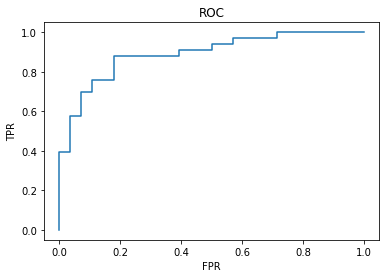

In [63]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')

In [64]:
accuracy_ls=[]
for thr in thresh:
    y_pred=np.where(y_prob_test[:,1]>thr,1,0)
    accuracy_ls.append(accuracy_score(y_test,y_pred,normalize=True))
accuracy_ls=pd.concat([pd.Series(thresh),pd.Series(accuracy_ls)],axis=1)
accuracy_ls.columns=['Thresholds','Accuracy']
accuracy_ls.sort_values(by='Accuracy',ascending=False,inplace=True)
accuracy_ls.head()

,Thresholds,Accuracy
10,0.460788,0.836066
7,0.612560,0.803279
9,0.563410,0.803279
8,0.606075,0.803279
6,0.653344,0.786885


In [65]:
# Here Thershold 0.460788 has highest accuraacy so we can choose that threshold 

In [67]:
pickle.dump(lgr,open('heart_logistic.pkl','wb'))

In [5]:
# HyperParameter Tunning